In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import math
import scipy.stats as stats
import pickle

In [2]:
train=pd.read_csv("D:\\Personal Projects\\Sales Store Prediction\\Train.csv") 
test=pd.read_csv("D:\\Personal Projects\\Sales Store Prediction\\Test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [6]:
#train = train
#train = train.append(test, sort=False)
#print(train.shape)

In [7]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


# Categorical features cleaning

In [8]:
list_categories = [col for col in list(train.columns) if train[col].dtype == 'object']

In [9]:
for category in list_categories:
    unique_values = train[category].unique()
    print(category, unique_values)

Item_Identifier ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size ['Medium' nan 'High' 'Small']
Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [10]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'])
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'])

In [11]:
train['Outlet_Type'] = train['Outlet_Type'].replace(['Supermarket Type1','Supermarket Type2','Supermarket Type3'],['Supermarket','Supermarket','Supermarket'])
test['Outlet_Type'] = test['Outlet_Type'].replace(['Supermarket Type1','Supermarket Type2','Supermarket Type3'],['Supermarket','Supermarket','Supermarket'])

In [12]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [13]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [14]:
train['Item_Type'] = train['Item_Type'].replace(['Dairy','Breakfast','Soft Drinks','Meat','Fruits and Vegetables','Baking Goods','Snack Foods','Frozen Foods','Hard Drinks','Breads','Starchy Foods','Seafood','Canned'],['Edible','Edible','Edible','Edible','Edible','Edible','Edible','Edible','Edible','Edible','Edible','Edible','Edible'])
train['Item_Type'] = train['Item_Type'].replace(['Household','Others', 'Health and Hygiene'],['Non-Edible','Non-Edible','Non-Edible'])

test['Item_Type'] = test['Item_Type'].replace(['Dairy','Breakfast','Soft Drinks','Meat','Fruits and Vegetables','Baking Goods','Snack Foods','Frozen Foods','Hard Drinks','Breads','Starchy Foods','Seafood','Canned'],['Edible','Edible','Edible','Edible','Edible','Edible','Edible','Edible','Edible','Edible','Edible','Edible','Edible'])
test['Item_Type'] = test['Item_Type'].replace(['Household','Others', 'Health and Hygiene'],['Non-Edible','Non-Edible','Non-Edible'])

In [15]:
train['Item_Type'].unique()

array(['Edible', 'Non-Edible'], dtype=object)

In [16]:
train['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDD38     9
NCJ30     9
FDV60     9
         ..
FDQ60     1
FDT35     1
FDY43     1
FDC23     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

# Handling missing value (categorical)

Find mode value of the categorical feature

In [17]:
print(train['Outlet_Size'].mode().values[0])
mode_outlet_size = train['Outlet_Size'].mode().values[0]

Medium


Fill all missing values with mode value

In [18]:
train['Outlet_Size'] = train['Outlet_Size'].replace(np.nan, mode_outlet_size)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Edible,249.8092,OUT049,1999,Medium,Tier 1,Supermarket,3735.1380
1,DRC01,5.92,Regular,0.019278,Edible,48.2692,OUT018,2009,Medium,Tier 3,Supermarket,443.4228
2,FDN15,17.50,Low Fat,0.016760,Edible,141.6180,OUT049,1999,Medium,Tier 1,Supermarket,2097.2700
3,FDX07,19.20,Regular,0.000000,Edible,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Non-Edible,53.8614,OUT013,1987,High,Tier 3,Supermarket,994.7052


In [19]:
print(test['Outlet_Size'].mode().values[0])
mode_outlet_size = test['Outlet_Size'].mode().values[0]
test['Outlet_Size'] = test['Outlet_Size'].replace(np.nan, mode_outlet_size)

Medium


# Handling missing value (numeric)

In [20]:
train[train.isna().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Edible,107.7622,OUT027,1985,Medium,Tier 3,Supermarket,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Edible,113.2834,OUT027,1985,Medium,Tier 3,Supermarket,2303.6680
21,FDW12,NaN,Regular,0.035400,Edible,144.5444,OUT027,1985,Medium,Tier 3,Supermarket,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Edible,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Edible,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Edible,189.0530,OUT027,1985,Medium,Tier 3,Supermarket,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Edible,164.7526,OUT027,1985,Medium,Tier 3,Supermarket,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Non-Edible,184.6608,OUT027,1985,Medium,Tier 3,Supermarket,2756.4120
8490,FDU44,NaN,Regular,0.102296,Edible,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


We have applied 2 approach for handling this:
1. Use median of the feature for filling missing values
2. Use random values from the feature for filling missing values

We can decide which one's better, by visualizing the feature

In [21]:
def impute_null_values(train, column, median_train):
    train[column + "_Median"] = train[column].fillna(median_train)
    train[column +"_Random"] = train[column]
    random_sample = train[column].dropna().sample(train[column].isnull().sum(),random_state=0)
    random_sample.index = train[train[column].isnull()].index
    train.loc[train[column].isnull(), column+'_Random'] = random_sample

In [22]:
impute_null_values(train, 'Item_Weight', train['Item_Weight'].median())
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Median,Item_Weight_Random
0,FDA15,9.30,Low Fat,0.016047,Edible,249.8092,OUT049,1999,Medium,Tier 1,Supermarket,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Edible,48.2692,OUT018,2009,Medium,Tier 3,Supermarket,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Edible,141.6180,OUT049,1999,Medium,Tier 1,Supermarket,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Edible,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Non-Edible,53.8614,OUT013,1987,High,Tier 3,Supermarket,994.7052,8.93,8.93


In [23]:
impute_null_values(test, 'Item_Weight', test['Item_Weight'].median())
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_Median,Item_Weight_Random
0,FDW58,20.750,Low Fat,0.007565,Edible,107.8622,OUT049,1999,Medium,Tier 1,Supermarket,20.750,20.750
1,FDW14,8.300,Regular,0.038428,Edible,87.3198,OUT017,2007,Medium,Tier 2,Supermarket,8.300,8.300
2,NCN55,14.600,Low Fat,0.099575,Non-Edible,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,14.600,14.600
3,FDQ58,7.315,Low Fat,0.015388,Edible,155.0340,OUT017,2007,Medium,Tier 2,Supermarket,7.315,7.315
4,FDY38,NaN,Regular,0.118599,Edible,234.2300,OUT027,1985,Medium,Tier 3,Supermarket,12.500,15.100


In [24]:
# from plotly.figure_factory import create_distplot
# data = [train['Item_Weight'].dropna(), train['Item_Weight_Median'], train['Item_Weight_Random']]
# group_labels = ['Original', 'Median', 'Random']
# fig = create_distplot(data, group_labels, bin_size=.2)
# fig.show()

We can see Item_Weight_Random has a much better distribution compared to Item_Weight_Median.

A huge spike can be seen in Item_Weight_Median.

So we can drop Item_Weight & Item_Weight_Median, as we will go ahead with Item_Weight_Random.

In [25]:
train = train.drop('Item_Weight_Median', axis=1)
train = train.drop('Item_Weight', axis=1)
test = test.drop('Item_Weight_Median', axis=1)
test = test.drop('Item_Weight', axis=1)
train.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Random
0,FDA15,Low Fat,0.016047,Edible,249.8092,OUT049,1999,Medium,Tier 1,Supermarket,3735.1380,9.30
1,DRC01,Regular,0.019278,Edible,48.2692,OUT018,2009,Medium,Tier 3,Supermarket,443.4228,5.92
2,FDN15,Low Fat,0.016760,Edible,141.6180,OUT049,1999,Medium,Tier 1,Supermarket,2097.2700,17.50
3,FDX07,Regular,0.000000,Edible,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Non-Edible,53.8614,OUT013,1987,High,Tier 3,Supermarket,994.7052,8.93


# Visualizing numeric features for Skewness check

In [26]:
# exclude_columns = ['Item_Outlet_Sales']
# numeric_columns = list(train.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_columns))
# for col in numeric_columns:
#     data = [train[col]]
#     group_labels = [col]
#     fig = ff.create_distplot(data, group_labels)
#     fig.show()

We can clearly see a Positive skewness in Item_Visibility feature. Lets try fixing it by using BoxCox. BoxCox is a technique to convert skewed distribution to normal distribution.

In [27]:
train['Item_Visibility_BoxCox'], param = stats.boxcox(train['Item_Visibility'] + 1)
test['Item_Visibility_BoxCox'], param = stats.boxcox(test['Item_Visibility'] + 1)

In [28]:
# data = [train['Item_Visibility']]
# group_labels = ['Item_Visibility']
# fig = ff.create_distplot(data, group_labels)
# fig.show()

# data = [train['Item_Visibility_BoxCox']]
# group_labels = ['Item_Visibility_BoxCox']
# fig = ff.create_distplot(data, group_labels)
# fig.show()

In [29]:
train = train.drop('Item_Visibility', axis=1)
test = test.drop('Item_Visibility', axis=1)
train.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Random,Item_Visibility_BoxCox
0,FDA15,Low Fat,Edible,249.8092,OUT049,1999,Medium,Tier 1,Supermarket,3735.1380,9.30,0.014866
1,DRC01,Regular,Edible,48.2692,OUT018,2009,Medium,Tier 3,Supermarket,443.4228,5.92,0.017593
2,FDN15,Low Fat,Edible,141.6180,OUT049,1999,Medium,Tier 1,Supermarket,2097.2700,17.50,0.015475
3,FDX07,Regular,Edible,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,19.20,0.000000
4,NCD19,Low Fat,Non-Edible,53.8614,OUT013,1987,High,Tier 3,Supermarket,994.7052,8.93,0.000000


# Visualizing numeric features for outlier

In [30]:
# exclude_columns = ['Item_Outlet_Sales']
# numeric_columns = list(train.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_columns))
# for col in numeric_columns:
#     group_labels = [col]
#     fig = px.box(train, y=col)
#     fig.show()

There are no outliers

# General Analysis

All numeric features have row count as 14204. So there are no missing values anymore.

In [31]:
train.describe()

,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight_Random,Item_Visibility_BoxCox
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,140.992782,1997.831867,2181.288914,12.837269,0.043346
std,62.275067,8.371760,1706.499616,4.633929,0.024834
min,31.290000,1985.000000,33.290000,4.555000,0.000000
25%,93.826500,1987.000000,834.247400,8.770000,0.023771
50%,143.012800,1999.000000,1794.331000,12.600000,0.042159
75%,185.643700,2004.000000,3101.296400,16.750000,0.062575
max,266.888400,2009.000000,13086.964800,21.350000,0.105202


# Correction

<AxesSubplot:>

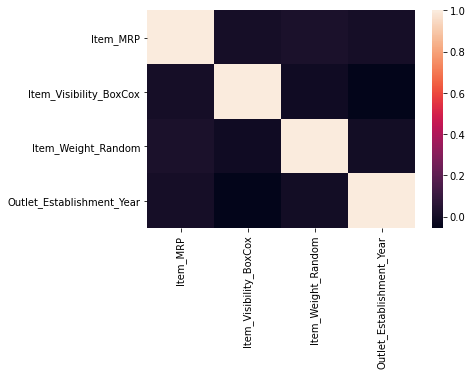

In [32]:
exclude_columns = ['Item_Outlet_Sales']
numeric_columns = list(train.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_columns))
sns.heatmap(train[numeric_columns].corr())

No correlation amongst numeric features

In [33]:
train.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Random,Item_Visibility_BoxCox
0,FDA15,Low Fat,Edible,249.8092,OUT049,1999,Medium,Tier 1,Supermarket,3735.1380,9.30,0.014866
1,DRC01,Regular,Edible,48.2692,OUT018,2009,Medium,Tier 3,Supermarket,443.4228,5.92,0.017593
2,FDN15,Low Fat,Edible,141.6180,OUT049,1999,Medium,Tier 1,Supermarket,2097.2700,17.50,0.015475
3,FDX07,Regular,Edible,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,19.20,0.000000
4,NCD19,Low Fat,Non-Edible,53.8614,OUT013,1987,High,Tier 3,Supermarket,994.7052,8.93,0.000000


Removing unnecessary features based on subjective knowledge

In [34]:
train = train.drop(['Outlet_Size', 'Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Location_Type', 'Item_Identifier'] ,axis=1)
test = test.drop(['Outlet_Size', 'Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Location_Type', 'Item_Identifier'] ,axis=1)

In [35]:
train.head()

,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Item_Weight_Random,Item_Visibility_BoxCox
0,Edible,249.8092,1999,Supermarket,3735.1380,9.30,0.014866
1,Edible,48.2692,2009,Supermarket,443.4228,5.92,0.017593
2,Edible,141.6180,1999,Supermarket,2097.2700,17.50,0.015475
3,Edible,182.0950,1998,Grocery Store,732.3800,19.20,0.000000
4,Non-Edible,53.8614,1987,Supermarket,994.7052,8.93,0.000000


# Encoding cateogrical feature

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Type                  8523 non-null   object 
 1   Item_MRP                   8523 non-null   float64
 2   Outlet_Establishment_Year  8523 non-null   int64  
 3   Outlet_Type                8523 non-null   object 
 4   Item_Outlet_Sales          8523 non-null   float64
 5   Item_Weight_Random         8523 non-null   float64
 6   Item_Visibility_BoxCox     8523 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 466.2+ KB


In [37]:
item_type = pd.get_dummies(train['Item_Type'], drop_first=True)
outlet_type = pd.get_dummies(train['Outlet_Type'], drop_first=True)   

In [38]:
train = train.drop(['Item_Type','Outlet_Type'], axis=1)

In [39]:
train = pd.concat([train, item_type, outlet_type], axis=1)

In [40]:
train.head()

,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight_Random,Item_Visibility_BoxCox,Non-Edible,Supermarket
0,249.8092,1999,3735.1380,9.30,0.014866,0,1
1,48.2692,2009,443.4228,5.92,0.017593,0,1
2,141.6180,1999,2097.2700,17.50,0.015475,0,1
3,182.0950,1998,732.3800,19.20,0.000000,0,0
4,53.8614,1987,994.7052,8.93,0.000000,1,1


In [41]:
item_type = pd.get_dummies(test['Item_Type'], drop_first=True)
outlet_type = pd.get_dummies(test['Outlet_Type'], drop_first=True)   
test = test.drop(['Item_Type','Outlet_Type'], axis=1)
test = pd.concat([test, item_type, outlet_type], axis=1)

# Scaling down features

In [42]:
train['Current_Year'] = 2021

In [43]:
train['Outlet_Establishment_Age'] = train['Current_Year'] - train['Outlet_Establishment_Year']

In [44]:
train = train.drop(['Outlet_Establishment_Year', 'Current_Year'], axis=1)

In [45]:
train.head()

,Item_MRP,Item_Outlet_Sales,Item_Weight_Random,Item_Visibility_BoxCox,Non-Edible,Supermarket,Outlet_Establishment_Age
0,249.8092,3735.1380,9.30,0.014866,0,1,22
1,48.2692,443.4228,5.92,0.017593,0,1,12
2,141.6180,2097.2700,17.50,0.015475,0,1,22
3,182.0950,732.3800,19.20,0.000000,0,0,23
4,53.8614,994.7052,8.93,0.000000,1,1,34


In [46]:
test['Current_Year'] = 2021
test['Outlet_Establishment_Age'] = test['Current_Year'] - test['Outlet_Establishment_Year']
test = test.drop(['Outlet_Establishment_Year', 'Current_Year'], axis=1)

# Splitting train & Training / Testing

In [47]:
# Arranging columns
train = train[['Item_MRP', 'Outlet_Establishment_Age', 'Item_Weight_Random', 'Item_Visibility_BoxCox', 'Non-Edible',
       'Supermarket', 'Item_Outlet_Sales']]

X = train.iloc[:, :-1]
y = train.iloc[:, -1]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Linear Regression

Linear Regression works better with standardized dataset

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [50]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

y_pred = linear_regressor.predict(X_test_scaled)

In [51]:
print("R Sq. Score for Linear Regression :", linear_regressor.score(X_train_scaled, y_train))

R Sq. Score for Linear Regression : 0.5187848688212173


In [52]:
with open('Linear_Regressor.pkl', 'wb') as file:  
    pickle.dump(linear_regressor, file)

# Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X, y)

y_pred = rf_regressor.predict(X_test)

In [55]:
print("R Sq. Score for Random Forest Regression :", rf_regressor.score(X, y))

R Sq. Score for Random Forest Regression : 0.9380912775422943


As we can see, Random Forest Regressor is giving better predictions than Linear Regression.

In [56]:
with open('RandomForest_Regressor.pkl', 'wb') as file:  
    pickle.dump(rf_regressor, file)

# XGBoost Regressor

In [57]:
import xgboost
xgb_regressor = xgboost.XGBRegressor()
xgb_regressor.fit(X, y)

y_pred = xgb_regressor.predict(X_test)

In [58]:
print("R Sq. Score for Random Forest Regression :", xgb_regressor.score(X, y))

R Sq. Score for Random Forest Regression : 0.8171085491037413


In [59]:
with open('XGBoost_Regressor.pkl', 'wb') as file:  
    pickle.dump(xgb_regressor, file)

# Prediction

Arranging features for test dataset

In [61]:
test = test[['Item_MRP', 'Outlet_Establishment_Age', 'Item_Weight_Random', 'Item_Visibility_BoxCox', 'Non-Edible',
       'Supermarket']]

In [62]:
y_pred = rf_regressor.predict(test)

In [63]:
output = pd.concat([test, pd.DataFrame(y_pred, columns=['Predicted_Sales'])], axis=1)
output

,Item_MRP,Outlet_Establishment_Age,Item_Weight_Random,Item_Visibility_BoxCox,Non-Edible,Supermarket,Predicted_Sales
0,107.8622,22,20.750,0.007292,0,1,1580.043270
1,87.3198,14,8.300,0.032092,0,1,1184.511464
2,241.7538,23,14.600,0.064358,1,0,794.579036
3,155.0340,14,7.315,0.014290,0,1,2498.714110
4,234.2300,36,15.100,0.071267,0,1,6246.102830
...,...,...,...,...,...,...,...
5676,141.3154,24,10.500,0.012646,0,1,2505.658404
5677,169.1448,12,7.600,0.078598,0,1,2202.905828
5678,118.7440,19,10.000,0.052779,1,1,1748.310904
5679,214.6218,14,15.300,0.000000,0,1,4830.412290
